<a href="https://colab.research.google.com/github/Akshatakasar13/Internship_Task2/blob/main/DefectDetectionTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Files Extracted**

In [68]:
zip_path = '/content/trainfnbottle'
!unzip -o "$zip_path" -d /content/extracted_file

Archive:  /content/trainfnbottle
   creating: /content/extracted_file/train_bottle/
   creating: /content/extracted_file/train_bottle/train_negtive/
  inflating: /content/extracted_file/train_bottle/train_negtive/000000000_jpg.rf.1cbba5936dd8a2cc1951643d0e78b386.jpg  
  inflating: /content/extracted_file/train_bottle/train_negtive/000000000_jpg.rf.655558273104a2ac437055d0ec38ea05.jpg  
  inflating: /content/extracted_file/train_bottle/train_negtive/000000000_jpg.rf.ac8610feb89fe0da2c5f0d7409b02069.jpg  
  inflating: /content/extracted_file/train_bottle/train_negtive/000000000_jpg.rf.eb966d55471048de5f21de0dffe1fd5c.jpg  
  inflating: /content/extracted_file/train_bottle/train_negtive/000000000_jpg.rf.f260d41fa2bd82737911c74cd9d36229.jpg  
  inflating: /content/extracted_file/train_bottle/train_negtive/000001_jpg.rf.48d5654cfbebad4b655016b957d490db.jpg  
  inflating: /content/extracted_file/train_bottle/train_negtive/000001_jpg.rf.d0dbd1e7fb096096dc072e835fc49850.jpg  
  inflating: /con

In [69]:
zip_path = '/content/trainlastcracks'
!unzip -o "$zip_path" -d /content/extracted_file

Archive:  /content/trainlastcracks
   creating: /content/extracted_file/Trainc/
   creating: /content/extracted_file/Trainc/traincrack_negative/
  inflating: /content/extracted_file/Trainc/traincrack_negative/00017.jpg  
  inflating: /content/extracted_file/Trainc/traincrack_negative/00018.jpg  
  inflating: /content/extracted_file/Trainc/traincrack_negative/00019.jpg  
  inflating: /content/extracted_file/Trainc/traincrack_negative/00020.jpg  
  inflating: /content/extracted_file/Trainc/traincrack_negative/00021.jpg  
  inflating: /content/extracted_file/Trainc/traincrack_negative/00022.jpg  
  inflating: /content/extracted_file/Trainc/traincrack_negative/00023.jpg  
  inflating: /content/extracted_file/Trainc/traincrack_negative/00024.jpg  
  inflating: /content/extracted_file/Trainc/traincrack_negative/00025.jpg  
  inflating: /content/extracted_file/Trainc/traincrack_negative/00026.jpg  
  inflating: /content/extracted_file/Trainc/traincrack_negative/00027.jpg  
  inflating: /conte

In [71]:
zip_path = '/content/trainfabric'
!unzip -o "$zip_path" -d /content/extracted_file

Archive:  /content/trainfabric
   creating: /content/extracted_file/trainfabric/train/
   creating: /content/extracted_file/trainfabric/train/images/
  inflating: /content/extracted_file/trainfabric/train/images/image10_jpg.rf.f20a6c05ac986388bbffe578c8b38ecf.jpg  
  inflating: /content/extracted_file/trainfabric/train/images/image13_jpg.rf.0d196eb4cbccfbed64ce8b71ae7ac74f.jpg  
  inflating: /content/extracted_file/trainfabric/train/images/image19_jpg.rf.a1c715400918760c347fb3f82f124f41.jpg  
  inflating: /content/extracted_file/trainfabric/train/images/image28_jpg.rf.e0c09c35bdd5e265d3c663c441e29e96.jpg  
  inflating: /content/extracted_file/trainfabric/train/images/image29_jpg.rf.a0020918db0a06ccef98bb43d7e575f6.jpg  
  inflating: /content/extracted_file/trainfabric/train/images/image32_jpg.rf.86804773dd76bce2c9fe9f2427cc3e3a.jpg  
  inflating: /content/extracted_file/trainfabric/train/images/image33_jpg.rf.0e7c9d8024ae65fb77167f9fb5a0e4dd.jpg  
  inflating: /content/extracted_file/t

## **Importing Libraries**

In [72]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report

## **Load the Dataset**

In [73]:
# Define paths for datasets
base_dir = "/content/extracted_file"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Paths for bottle, crack, and holes defect datasets (positive and negative)
datasets = {
    "bottle_defect": {"positive": "/content/extracted_files/train_bottle/train_positive", "negative": "/content/extracted_files/train_bottle/train_negtive"},
    "crack_defect": {"positive": "/content/extracted_files/Trainc/traincrack_positive", "negative": "/content/extracted_files/Trainc/traincrack_negative"},
      "holes_defect": {"negative": "/content/extracted_files/trainfabric/train/images"}}

In [74]:
# Create folders for each category and label
categories = ["bottle_defect", "crack_defect", "holes_defect", "non_defect"]
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)


## **Distributing and Spliting the Data**

In [75]:
#Distribute data into train/test folders**
for category, paths in datasets.items():
    if category != "holes_defect":
        # For bottle and crack datasets (positive and negative data)
        positive_images = os.listdir(paths["positive"])
        negative_images = os.listdir(paths["negative"])

        # Balance the dataset
        max_samples = min(len(positive_images), len(negative_images))
        positive_images = positive_images[:max_samples]
        negative_images = negative_images[:max_samples]

        # Split data (80% train, 20% test)
        train_pos, test_pos = train_test_split(positive_images, test_size=0.2, random_state=42)
        train_neg, test_neg = train_test_split(negative_images, test_size=0.2, random_state=42)

        # Move images to train folder
        for img in train_pos:
            shutil.copy(os.path.join(paths["positive"], img), os.path.join(train_dir, category, img))
        for img in test_pos:
            shutil.copy(os.path.join(paths["positive"], img), os.path.join(test_dir, category, img))
        for img in train_neg:
            shutil.copy(os.path.join(paths["negative"], img), os.path.join(train_dir, "non_defect", img))
        for img in test_neg:
            shutil.copy(os.path.join(paths["negative"], img), os.path.join(test_dir, "non_defect", img))

    else:
        # For holes_defect (only negative data)
        negative_images = os.listdir(paths["negative"])

        # Split data (80% train, 20% test)
        train_neg, test_neg = train_test_split(negative_images, test_size=0.2, random_state=42)

        # Move images to train folder
        for img in train_neg:
            shutil.copy(os.path.join(paths["negative"], img), os.path.join(train_dir, category, img))
        for img in test_neg:
            shutil.copy(os.path.join(paths["negative"], img), os.path.join(test_dir, category, img))

print("Dataset organized into train and test folders.")


Dataset organized into train and test folders.


## **Data augmentation and preprocessing**

In [76]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

#For balancing dataset
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(zip(np.unique(train_generator.classes), class_weights))



Found 429 images belonging to 4 classes.
Found 110 images belonging to 4 classes.


## **model Selection and Training**

In [78]:
#define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Multi-class output
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with class weights
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=validation_steps,
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.2405 - loss: 2.2280 - val_accuracy: 0.4896 - val_loss: 1.1818
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.3438 - loss: 1.3866 - val_accuracy: 0.0714 - val_loss: 1.3486
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.3448 - loss: 1.4063 - val_accuracy: 0.4583 - val_loss: 1.0661
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.3750 - loss: 1.2840 - val_accuracy: 0.3571 - val_loss: 1.0960
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4348 - loss: 1.1342 - val_accuracy: 0.6979 - val_loss: 0.8820
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.3438 - loss: 1.1341 - val_accuracy: 0.4286 - val_loss: 0.9807
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5278 - loss: 1.0563 - val_accuracy: 0.7500 - val_loss: 0.5845
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4615 - loss: 0.5293 - val_accuracy: 0.6429 - va

In [79]:
# Save the trained model
model.save("multi_defect_classification_model.h5")
print("Model saved as 'multi_defect_classification_model.h5'")

Model saved as 'multi_defect_classification_model.h5'


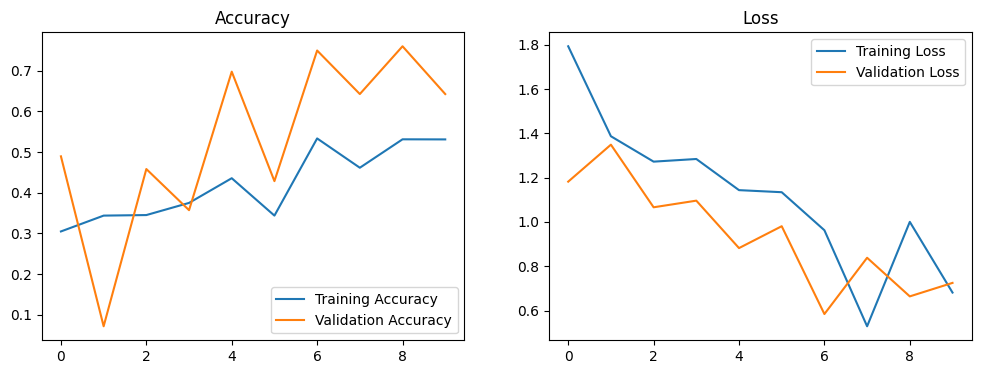

In [80]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

## **Model Evaluation**

In [81]:
#evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 358ms/step - accuracy: 0.7747 - loss: 0.5800
Test Accuracy: 75.45%


## **Predictive Model**

In [84]:
# Load the trained model
model = load_model("multi_defect_classification_model.h5")
print("Model loaded successfully.")

# Class labels (same as used during training)
class_labels = list(train_generator.class_indices.keys())
print("Class Labels:", class_labels)

# Function to predict the defect type
def predict_defect(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_label = class_labels[predicted_class_index]

    # Confidence score
    confidence_score = predictions[0][predicted_class_index] * 100

    # Return the result
    if predicted_label == "non_defect":
        return f"No Defect (Confidence: {confidence_score:.2f}%)"
    else:
        return f"Defect Detected: {predicted_label} (Confidence: {confidence_score:.2f}%)"

# Example usage
image_path = "/content/crack.jpg"  # Replace with the path to your test image
result = predict_defect(image_path)
print("Prediction Result:", result)


Model loaded successfully.
Class Labels: ['bottle_defect', 'crack_defect', 'holes_defect', 'non_defect']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Prediction Result: Defect Detected: crack_defect (Confidence: 47.84%)


In [85]:
def predict_defect(image_path):

    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))  # Resize to match the input size of the model
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_label = class_labels[predicted_class_index]

    # Confidence score
    confidence_score = predictions[0][predicted_class_index] * 100

    # Return the result
    if predicted_label == "non_defect":
        return f"No Defect (Confidence: {confidence_score:.2f}%)"
    else:
        return f"Defect Detected: {predicted_label} (Confidence: {confidence_score:.2f}%)"

# Example usage
image_path = "/content/hole.rf.45a7576251c82e3abe00ca50b152c835.jpg"  # Replace with the path to your test image
result = predict_defect(image_path)
print("Prediction Result:", result)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction Result: Defect Detected: holes_defect (Confidence: 78.86%)
